### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import re
import string
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
import textblob
from textblob import TextBlob
from string import punctuation
from nltk.corpus import stopwords
nltk.download('stopwords')
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from plotly import graph_objs as go
import plotly.express as px
from wordcloud import WordCloud, ImageColorGenerator
import spacy
from spacy import displacy
import en_core_web_sm
nlp = en_core_web_sm.load()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\junai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\junai\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\junai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Installing Libraries

In [161]:
pip install spacy

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 11.9/11.9 MB 491.9 kB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 612.6 kB/s eta 0:00:00
     ------------------------------------ 181.6/181.6 kB 782.7 kB/s eta 0:00:00
     -------------------------------------- 96.8/96.8 kB 692.2 kB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 481.4/481.4 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 48.9/48.9 kB 613.0 kB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 758.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [202]:
pip install botometer

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ------------------------------------- 151.7/151.7 kB 71.8 kB/s eta 0:00:00


In [12]:
!python -m spacy download en_core_web_lg 

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 587.7/587.7 MB 300.2 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [81]:
!pip3 install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 153.1/153.1 kB 247.1 kB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [48]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 636.8/636.8 kB 113.9 kB/s eta 0:00:00


### Command run on Ananconda Command terminal

In [46]:
pip install spacy==3.4.0

Defaulting to user installation because normal site-packages is not writeable
  Using cached spacy-2.3.5-cp39-cp39-win_amd64.whl (9.4 MB)
  Using cached thinc-7.4.6-cp39-cp39-win_amd64.whl (830 kB)
  Using cached catalogue-1.0.2-py2.py3-none-any.whl (16 kB)
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.5
    Uninstalling thinc-8.1.5:
      Successfully uninstalled thinc-8.1.5
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\junai\\AppData\\Roaming\\Python\\Python39\\site-packages\\~hinc\\backends\\cblas.cp39-win_amd64.pyd'
Check the permissions.



In [51]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 13.7/13.7 MB 233.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 11.1/11.1 MB 151.9 kB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 210.7 kB/s eta 0:00:00
  Using cached srsly-2.4.5-cp39-cp39-win_amd64.whl (481 kB)
     ---------------------------------------- 1.0/1.0 MB 296.2 kB/s eta 0:00:00
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
     -------------------------------------- 82.8/82.8 kB 178.7 kB/s eta 0:00:00
  Created wheel for en-core-web-sm: filename=en_core_web_sm-3.0.0-py3-none-any.whl size=13704307 sha256=2232c566da54e3e69af6da1bc3083e8df8fc9e6de831a78be048a3d29f637945
  Stored in directory: c:\users\junai\appdata\local\pip\cache\wheels\88\16\62\706709a80d48c983fffc44547114a933c464cd032e19378fb2
Succes

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\junai\\AppData\\Roaming\\Python\\Python39\\site-packages\\~ydantic\\annotated_types.cp39-win_amd64.pyd'
Check the permissions.



### Reading Json file of tweets

In [2]:
df = pd.read_json('Election Tweets (1).json')

### Showing the head of The dataframe

In [3]:
df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorited,retweeted,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,possibly_sensitive,retweeted_status,extended_entities
0,2019-09-11 18:38:30+00:00,1171855551531225089,1.171856e+18,@CTVNews I wonder why. No. Wait. I don’t. #...,0.0,"[9, 67]","{'hashtags': [{'text': 'Immigration', 'indices...","<a href=""http://twitter.com/download/iphone"" r...",1.171854e+18,1.171854e+18,...,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-09-11 11:51:52+00:00,1171753219116191744,1.171753e+18,We have been warning Canadians about the threa...,0.0,"[0, 170]","{'hashtags': [{'text': 'cdnpoli', 'indices': [...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,0.0,0.0,en,1.171632e+18,1.171632e+18,"{'url': 'https://t.co/Z3y8UUhmcy', 'expanded':...",{'created_at': 'Wed Sep 11 03:50:14 +0000 2019...,0.0,NaN,NaN
2,2019-09-11 14:46:19+00:00,1171797123605651458,1.171797e+18,@DiCintio You will be sleeping forever! #VOTE ...,0.0,"[10, 283]","{'hashtags': [{'text': 'VOTE', 'indices': [40,...","<a href=""http://twitter.com/download/iphone"" r...",1.171774e+18,1.171774e+18,...,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-09-11 19:10:27+00:00,1171863594746687488,1.171864e+18,So if #SNCLavalin never existed at all what wo...,0.0,"[0, 277]","{'hashtags': [{'text': 'SNCLavalin', 'indices'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-09-11 02:46:33+00:00,1171615987692711936,1.171616e+18,RT @Wolfer_dot_ca: Immigrant Diversity Killed ...,0.0,"[0, 140]","{'hashtags': [{'text': 'historyteacher', 'indi...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,...,0.0,0.0,en,NaN,NaN,NaN,NaN,0.0,{'created_at': 'Wed Sep 11 01:13:28 +0000 2019...,NaN


In [4]:
df.shape

(4966, 31)

### Columns of Dataframe

In [5]:
df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status', 'possibly_sensitive', 'retweeted_status',
       'extended_entities'],
      dtype='object')

In [6]:
df['user'][4]['friends_count']

474

### Identifiying the column which contain Tweets text

In [7]:
df.full_text

0       @CTVNews I wonder why.  No.  Wait.  I don’t. #...
1       We have been warning Canadians about the threa...
2       @DiCintio You will be sleeping forever! #VOTE ...
3       So if #SNCLavalin never existed at all what wo...
4       RT @Wolfer_dot_ca: Immigrant Diversity Killed ...
                              ...                        
4961    @carolemacneil @CBCNews Isn't it true some imm...
4962    UNHCR Canada was referenced a few times in thi...
4963    What questions do you have about immigration i...
4964    "Fundamentally, ⁦@AndrewScheer⁩ is talking abo...
4965    @LizT1\nOnward lawsuit against #Canadian #FATC...
Name: full_text, Length: 4966, dtype: object

### Removing the unnecessary columns of dataframe

In [8]:
df = df[["id","full_text",'user']]

### Showing head of dataset after removing unnecessary columns

In [9]:
df.head()

,id,full_text,user
0,1171855551531225089,@CTVNews I wonder why. No. Wait. I don’t. #...,"{'id': 853360772683939840, 'id_str': '85336077..."
1,1171753219116191744,We have been warning Canadians about the threa...,"{'id': 961472911805636608, 'id_str': '96147291..."
2,1171797123605651458,@DiCintio You will be sleeping forever! #VOTE ...,"{'id': 302984766, 'id_str': '302984766', 'name..."
3,1171863594746687488,So if #SNCLavalin never existed at all what wo...,"{'id': 457136882, 'id_str': '457136882', 'name..."
4,1171615987692711936,RT @Wolfer_dot_ca: Immigrant Diversity Killed ...,"{'id': 1584464694, 'id_str': '1584464694', 'na..."


### Removing the unnecessary words and unwanted symbols from text

In [10]:
#preprocessing the raw tweets
def clean_tweet(text):# Function to remove unwanted words
    text = str(text).lower() # lowercase the text
    text = ' '.join([word for word in text.split() if not word.startswith('@')]) # get rid of usernames
    text = ' '.join([word for word in text.split() if not word.startswith('#')]) # get rid of hashtags
    text = re.sub('https?://\S+|www\.\S+', '', text) # remove urls
    if text is None:
        return ''
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\n', '', text) # drop all line feeds
    text = re.sub('\w*\d\w*', '', text) # bye digits in words
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text

### Cleaning the tweet text and then save it into tweet text

In [11]:
lis=[]
X=np.array(df['full_text'])
X=np.ndarray.tolist(X)
for a in range(0,len(df['full_text'])):
    lis.append(clean_tweet(str(X[a])))
df['full_text']=pd.Series(lis)

 ### Showing the clean tweets

In [12]:
df.full_text

0                            i wonder why no wait i don’t
1       we have been warning canadians about the threa...
2                       you will be sleeping forever cuts
3       so if never existed at all what would be talki...
4         rt immigrant diversity killed canadian history 
                              ...                        
4961    isnt it true some immigrants come to canada ap...
4962    unhcr canada was referenced a few times in thi...
4963    what questions do you have about immigration i...
4964    fundamentally ⁦andrewscheer⁩ is talking about ...
4965    onward lawsuit against iga needs to stop unjus...
Name: full_text, Length: 4966, dtype: object

### Dropping the rows containing null

In [13]:
df.dropna(inplace=True)
df=df.reset_index(drop=True)

In [14]:
df.shape

(4815, 3)

### Tokenizing the tweets and saving the token in a column named "tokenized_tweets"

In [91]:
df['tokenized_tweets'] = df.apply(lambda row: nltk.word_tokenize(row['full_text']), axis=1)
df

,id,full_text,user,tokenized_tweets
0,1171855551531225089,i wonder why no wait i don’t,"{'id': 853360772683939840, 'id_str': '85336077...","[i, wonder, why, no, wait, i, don, ’, t]"
1,1171753219116191744,we have been warning canadians about the threa...,"{'id': 961472911805636608, 'id_str': '96147291...","[we, have, been, warning, canadians, about, th..."
2,1171797123605651458,you will be sleeping forever cuts,"{'id': 302984766, 'id_str': '302984766', 'name...","[you, will, be, sleeping, forever, cuts]"
3,1171863594746687488,so if never existed at all what would be talki...,"{'id': 457136882, 'id_str': '457136882', 'name...","[so, if, never, existed, at, all, what, would,..."
4,1171615987692711936,rt immigrant diversity killed canadian history,"{'id': 1584464694, 'id_str': '1584464694', 'na...","[rt, immigrant, diversity, killed, canadian, h..."
...,...,...,...,...
4810,1179133796484038658,isnt it true some immigrants come to canada ap...,"{'id': 1170403724679884801, 'id_str': '1170403...","[isnt, it, true, some, immigrants, come, to, c..."
4811,1179160740038680577,unhcr canada was referenced a few times in thi...,"{'id': 106759048, 'id_str': '106759048', 'name...","[unhcr, canada, was, referenced, a, few, times..."
4812,1179102068738531329,what questions do you have about immigration i...,"{'id': 247411057, 'id_str': '247411057', 'name...","[what, questions, do, you, have, about, immigr..."
4813,1179181040423854080,fundamentally ⁦andrewscheer⁩ is talking about ...,"{'id': 95998483, 'id_str': '95998483', 'name':...","[fundamentally, ⁦andrewscheer⁩, is, talking, a..."


### Counting the Token in all tweets

In [92]:
count_tweet=0
for i in range(0,len(df)):
   count_tweet=count_tweet+ len(df.tokenized_tweets[0])

### Showing the count of tokens

In [93]:
count_tweet

43335

### Saving the tweets text into data variable 

In [94]:
data= df.full_text

In [95]:
data

0                            i wonder why no wait i don’t
1       we have been warning canadians about the threa...
2                       you will be sleeping forever cuts
3       so if never existed at all what would be talki...
4         rt immigrant diversity killed canadian history 
                              ...                        
4810    isnt it true some immigrants come to canada ap...
4811    unhcr canada was referenced a few times in thi...
4812    what questions do you have about immigration i...
4813    fundamentally ⁦andrewscheer⁩ is talking about ...
4814    onward lawsuit against iga needs to stop unjus...
Name: full_text, Length: 4815, dtype: object

### Calculating the sentiment of the tweets and saving them in a separate columns named "sentiment"

In [96]:
#calculate sentiments from tweets

sentiment_scores_tb = [round(TextBlob(str(new)).sentiment.polarity, 3) for new in data]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]
print (type(sentiment_category_tb))
senti=pd.DataFrame(sentiment_category_tb)
print (type(senti))
df['sentiment']=senti
df.dropna(inplace=True)
df

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


,id,full_text,user,tokenized_tweets,sentiment
0,1171855551531225089,i wonder why no wait i don’t,"{'id': 853360772683939840, 'id_str': '85336077...","[i, wonder, why, no, wait, i, don, ’, t]",neutral
1,1171753219116191744,we have been warning canadians about the threa...,"{'id': 961472911805636608, 'id_str': '96147291...","[we, have, been, warning, canadians, about, th...",positive
2,1171797123605651458,you will be sleeping forever cuts,"{'id': 302984766, 'id_str': '302984766', 'name...","[you, will, be, sleeping, forever, cuts]",neutral
3,1171863594746687488,so if never existed at all what would be talki...,"{'id': 457136882, 'id_str': '457136882', 'name...","[so, if, never, existed, at, all, what, would,...",positive
4,1171615987692711936,rt immigrant diversity killed canadian history,"{'id': 1584464694, 'id_str': '1584464694', 'na...","[rt, immigrant, diversity, killed, canadian, h...",negative
...,...,...,...,...,...
4810,1179133796484038658,isnt it true some immigrants come to canada ap...,"{'id': 1170403724679884801, 'id_str': '1170403...","[isnt, it, true, some, immigrants, come, to, c...",positive
4811,1179160740038680577,unhcr canada was referenced a few times in thi...,"{'id': 106759048, 'id_str': '106759048', 'name...","[unhcr, canada, was, referenced, a, few, times...",positive
4812,1179102068738531329,what questions do you have about immigration i...,"{'id': 247411057, 'id_str': '247411057', 'name...","[what, questions, do, you, have, about, immigr...",positive
4813,1179181040423854080,fundamentally ⁦andrewscheer⁩ is talking about ...,"{'id': 95998483, 'id_str': '95998483', 'name':...","[fundamentally, ⁦andrewscheer⁩, is, talking, a...",positive


### Removing the stopwords from the full text for showing the filter list for words cloud

In [97]:
#remove stopwords from tweets
stop_words = stopwords.words('english')
df['full_text'] = df['full_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))

### Showing the count of the tweets sentiment

In [98]:
temp = df.groupby('sentiment').count()['full_text'].reset_index().sort_values(by='full_text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,full_text
2,positive,2092
1,neutral,1473
0,negative,1250


### Ploting raph showing the tweet count

<AxesSubplot:xlabel='sentiment', ylabel='count'>

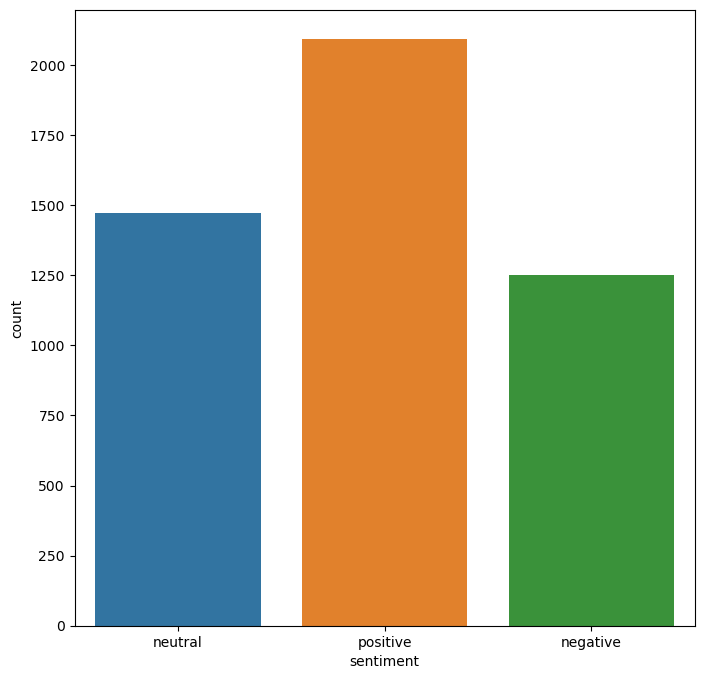

In [99]:
#Bar chat to show overall sentiment scores in tweets
plt.figure(figsize=(8,8))
sns.countplot(x='sentiment',data=df)

### Showing the most common word used in all tweets 

In [100]:
df['temp_list'] = df['full_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
#temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
0,rt,1713
1,immigration,1481
2,refugees,853
3,canada,711
4,amp,622
5,border,565
6,scheer,504
7,canadians,472
8,immigrants,438
9,trudeau,399


### Plotting bar graph for most used word in all tweets

In [101]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

 ### Ploting the tree for most used words in all tweets

In [102]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

### Separating the tweets on the basis of their sentiments

In [103]:
Positive_sent = df[df['sentiment']=='positive']
Negative_sent = df[df['sentiment']=='negative']
Neutral_sent = df[df['sentiment']=='neutral']

### Identifying the most used word in Positive tweets

In [104]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,immigration,811
1,rt,587
2,canada,355
3,canadians,336
4,many,292
5,amp,290
6,refugees,247
7,policies,230
8,immigrants,228
9,border,212


### Plotting bar graph for most used for in positive Sentiment tweets

In [105]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show

<bound method BaseFigure.show of Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Common_words=%{y}<br>count=%{x}<extra></extra>',
              'legendgroup': 'immigration',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'immigration',
              'offsetgroup': 'immigration',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([811], dtype=int64),
              'xaxis': 'x',
              'y': array(['immigration'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Common_words=%{y}<br>count=%{x}<extra></extra>',
              'legendgroup': 'rt',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'rt',
              'offsetgroup': 'rt',
              'orientation': 'h',
              'showl

### Plotting the tree map of the most common words in positive tweets 

In [107]:
#treemap of most common positive words in tweets
fig = px.treemap(temp_positive, path=['Common_words'], values='count',title='Tree Of Most Common Positive Words')
fig.show()

### Identifying the most used word in negative sentiment tweets

In [108]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,refugees,457
2,scheer,292
3,hate,288
4,andrew,260
5,don’t,257
6,stop,256
7,lying,245
8,spreading,242
9,dear,239
10,pls,238


### Plotting bar graph of the most words in negative tweets

In [109]:
fig = px.bar(temp_negative, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

### Tree map for most used words in negative sentiment tweets

In [110]:
#treemap of most common negative words in tweets
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

### identiying the most used words in neutral sentiment tweets

In [111]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

,Common_words,count
1,immigration,452
2,de,190
3,border,167
4,canada,155
5,refugees,149
6,amp,143
7,scheer,137
8,trudeau,133
9,says,122
10,la,106


### Plotting bar graph for most used words in neutral sentiments tweets

In [112]:
#treemap of most common words in neutral tweets
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

### Tree map for most used words in neutral sentiment tweets

In [113]:
fig = px.treemap(temp_neutral, path=['Common_words'], values='count',title='Tree Of Most Common Neutral Words')
fig.show()

### Word cloud for all Tweets

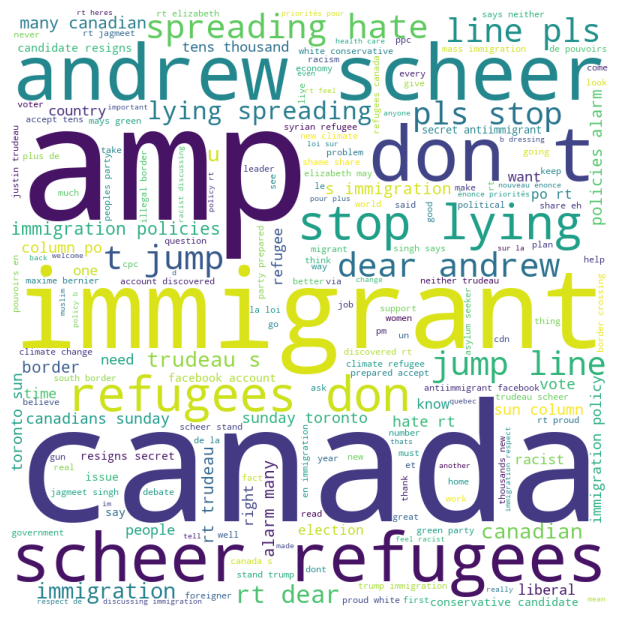

In [114]:
# Wordcloud for most common words in all tweets
comment_words = ''
for val in df.full_text: 
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split() 
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()     
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Word cloud for positive tweets

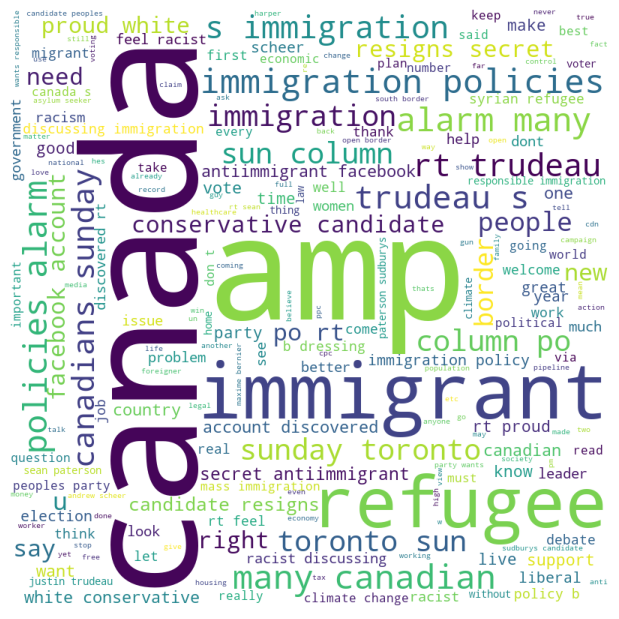

In [115]:
# Wordcloud for most common words in all positive tweets
comment_words = ''
for val in Positive_sent.full_text: 
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split() 
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()     
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Word cloud for negative sentinment tweets

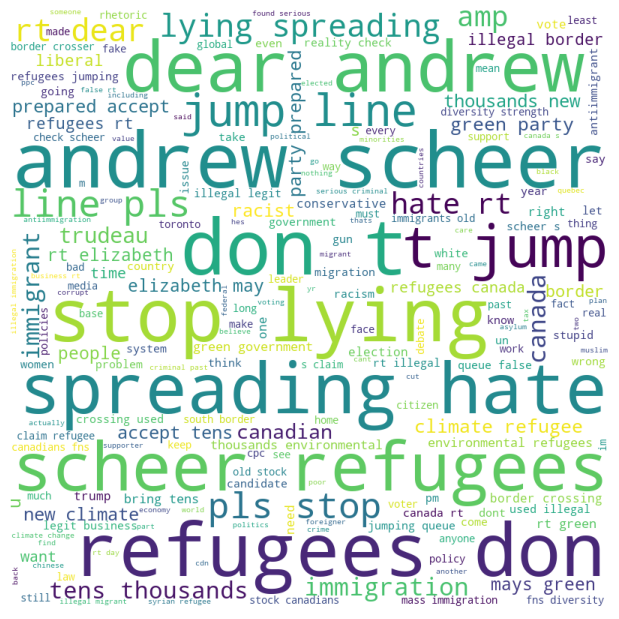

In [116]:
# Wordcloud for most common words in all negative tweets
comment_words = ''
for val in Negative_sent.full_text: 
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split() 
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()     
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Word Cloud for Neutral sentiment tweet

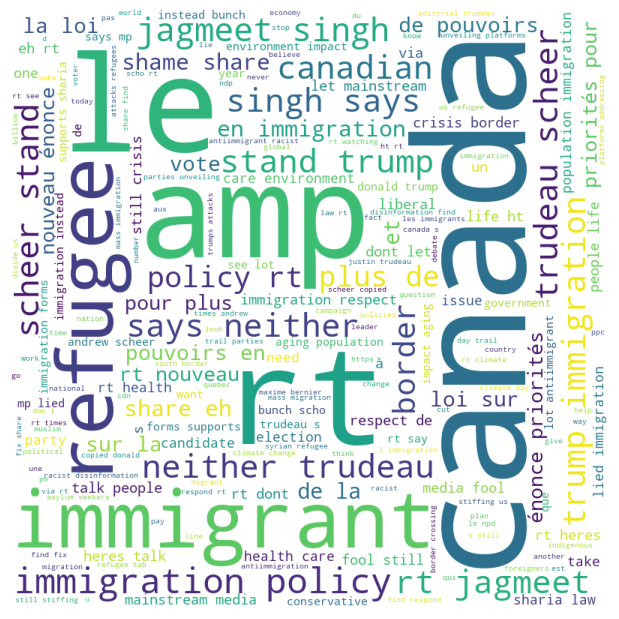

In [117]:
# Wordcloud for most common words in all Neutral tweets
comment_words = ''
for val in Neutral_sent.full_text: 
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split() 
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()     
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Extracting user column detail in separate Columns

In [118]:
df['Name']=''
df['Connection']=0
for i in range(0,len(df)):
    df['Name'][i]=df['user'][i]['name']
    df['Connection'][i]=df['user'][i]['friends_count']


### Saving the name and Connection in separate dataframe

In [119]:
df_user = df[['Name','Connection']]

### Remaving the duplicates from user dataframe

In [120]:
df_user.drop_duplicates(inplace=True)
df_user=df_user.reset_index(drop=True)

### Showing the head of user detailed dataframe

In [121]:
df_user.head()

,Name,Connection
0,Ian Bridges 🇨🇦,957
1,National Citizens Alliance,74
2,Marg Bartlett💪😄❤️🇨🇦😘,4998
3,Jason Pugh,2461
4,Kathy,474


In [179]:
df_user=df_user.sort_values(by='Connection',ascending=False)

<AxesSubplot:xlabel='Name'>

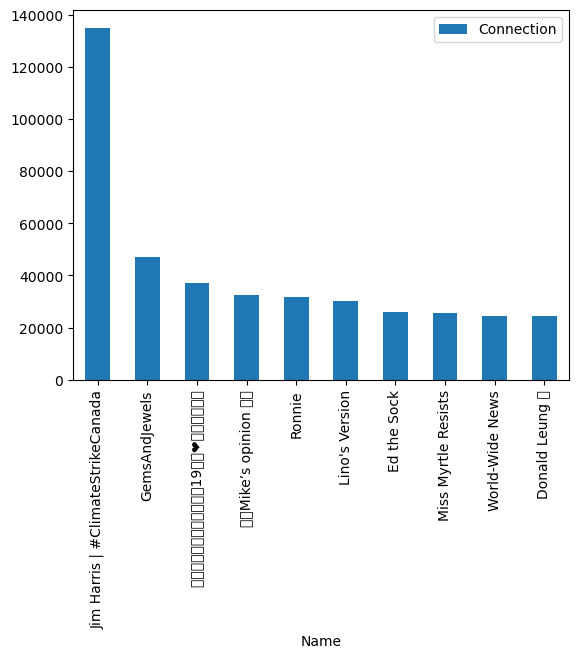

In [182]:
df_user.index = df_user['Name']
df_user[:10].plot(kind='bar')

### Extracting description from user column

In [127]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [146]:
NER = spacy.load("en_core_web_sm",disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer"])
df['NER']=''
for i in range(0,len(df)):
    ner=[]
    text1= NER(df['user'][i]['description'])
    for word in text1.ents:
        ner.append((word.text,word.label_))
    df['NER'][i]=ner


In [175]:
df

,id,full_text,user,tokenized_tweets,sentiment,temp_list,Name,Connection,NER,Organization,Person
0,1171855551531225089,wonder wait don’t,"{'id': 853360772683939840, 'id_str': '85336077...","[i, wonder, why, no, wait, i, don, ’, t]",neutral,"[wonder, wait, don’t]",Ian Bridges 🇨🇦,957,[(The National Citizens Alliance | Future MP f...,[The National Citizens Alliance | Future MP fo...,[]
1,1171753219116191744,warning canadians threat open borders unglobal...,"{'id': 961472911805636608, 'id_str': '96147291...","[we, have, been, warning, canadians, about, th...",positive,"[warning, canadians, threat, open, borders, un...",National Citizens Alliance,74,"[(Canadian Federal Political Party, ORG), (Can...",[Canadian Federal Political Party],[]
2,1171797123605651458,sleeping forever cuts,"{'id': 302984766, 'id_str': '302984766', 'name...","[you, will, be, sleeping, forever, cuts]",neutral,"[sleeping, forever, cuts]",Marg Bartlett💪😄❤️🇨🇦😘,4998,"[(Plays, PERSON), (Listens, PERSON), (Duck Tol...",[],"[Plays, Listens, Duck Toller Dogs]"
3,1171863594746687488,never existed would talking today last fall fa...,"{'id': 457136882, 'id_str': '457136882', 'name...","[so, if, never, existed, at, all, what, would,...",positive,"[never, existed, would, talking, today, last, ...",Jason Pugh,2461,"[(#ChooseForward #, MONEY), (TeamTrudeau, MONE...",[],[Trudeau]
4,1171615987692711936,rt immigrant diversity killed canadian history,"{'id': 1584464694, 'id_str': '1584464694', 'na...","[rt, immigrant, diversity, killed, canadian, h...",negative,"[rt, immigrant, diversity, killed, canadian, h...",Kathy,474,"[(Grandmother, PERSON)]",[],[Grandmother]
...,...,...,...,...,...,...,...,...,...,...,...
4810,1179133796484038658,isnt true immigrants come canada apply become ...,"{'id': 1170403724679884801, 'id_str': '1170403...","[isnt, it, true, some, immigrants, come, to, c...",positive,"[isnt, true, immigrants, come, canada, apply, ...",Delvin Ahde,33,"[(Tarbutt, GPE)]",[],[]
4811,1179160740038680577,unhcr canada referenced times piece info irreg...,"{'id': 106759048, 'id_str': '106759048', 'name...","[unhcr, canada, was, referenced, a, few, times...",positive,"[unhcr, canada, referenced, times, piece, info...",Melanie Gallant,2721,"[(Comms @UNHCRCanada, GPE)]",[],[]
4812,1179102068738531329,questions immigration issues heading election ...,"{'id': 247411057, 'id_str': '247411057', 'name...","[what, questions, do, you, have, about, immigr...",positive,"[questions, immigration, issues, heading, elec...",Carole MacNeil,1308,"[(CBC News Network, ORG), (tonight, TIME), (7-...",[CBC News Network],[]
4813,1179181040423854080,fundamentally ⁦andrewscheer⁩ talking immunizin...,"{'id': 95998483, 'id_str': '95998483', 'name':...","[fundamentally, ⁦andrewscheer⁩, is, talking, a...",positive,"[fundamentally, ⁦andrewscheer⁩, talking, immun...",Howard Cole,492,"[(Canada, GPE), (Horticulture student &, ORG),...",[Horticulture student &],[Gardener]


In [171]:
df['Organization']=''
df['Person']=''
for i in range(0,len(df)):
    organization=[]
    person=[]
    for j in range(0,len(df['NER'][i])):
        if df['NER'][i][j][1]=='ORG':
            organization.append(df['NER'][i][j][0])
        if df['NER'][i][j][1]=='PERSON':
            person.append(df['NER'][i][j][0])
    df['Organization'][i]=organization
    df["Person"][i]=person
            

In [190]:
df['Organization'] = df['Organization'].astype(str)

In [191]:
df = df.dropna(subset='user')
df = df.reset_index()

In [192]:
govt = ['federal','national', 'agency','institute','institution','corporation','healthcare','parliament','un','consulting','council']
political = ['political','politics','party']
journalist = ['journalist','journalism','news reporter', 'news','reporter','cnn','msnbc','bbc']
society_groups = ['society','workforce']

In [193]:
for i in range(len(df)):
#     print(i)
    if(df.loc[i, 'Organization'] == '[]'):
        df.loc[i, 'Actor'] = 'lay citizens'
    elif(any(ext in df.loc[i, 'Organization'].lower() for ext in political)):
        df.loc[i, 'Actor'] = 'political'
    elif(any(ext in df.loc[i, 'Organization'].lower() for ext in journalist)):
        df.loc[i, 'Actor'] = 'journalists'
    elif(any(ext in df.loc[i, 'Organization'].lower() for ext in society_groups)):
        df.loc[i, 'Actor'] = 'society groups'
    elif(any(ext in df.loc[i, 'Organization'].lower() for ext in govt)):
        df.loc[i, 'Actor'] = 'organization'
    else:
        df.loc[i, 'Actor'] = 'organization'

In [194]:
df['Actor'].value_counts()

lay citizens      2770
organization      1834
political          140
journalists         65
society groups       6
Name: Actor, dtype: int64

### Total tweets count with their category

<AxesSubplot:xlabel='Actor', ylabel='count'>

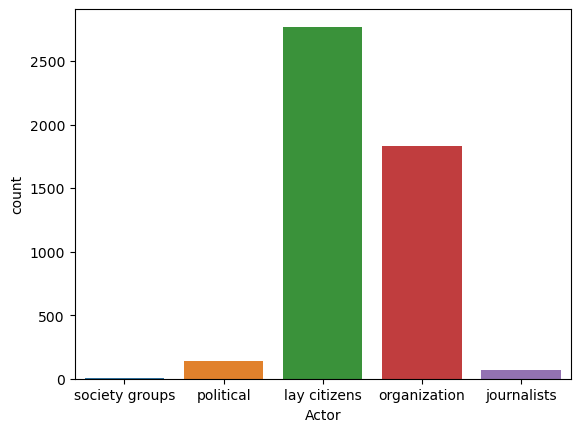

In [195]:
sns.countplot(x='Actor',data=df)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

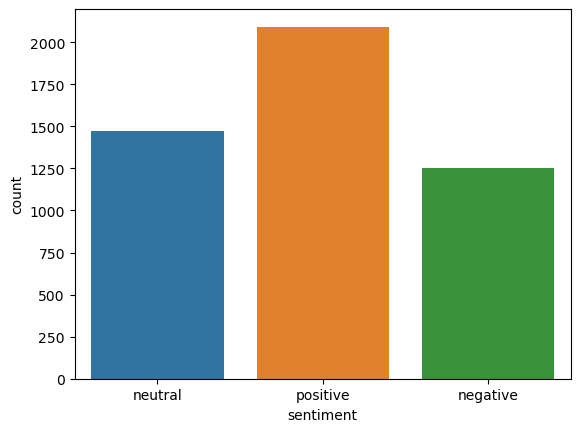

In [196]:
sns.countplot(x='sentiment',data=df)

### Number of positive, negative and neutral sentimental with their category

<AxesSubplot:xlabel='Actor', ylabel='count'>

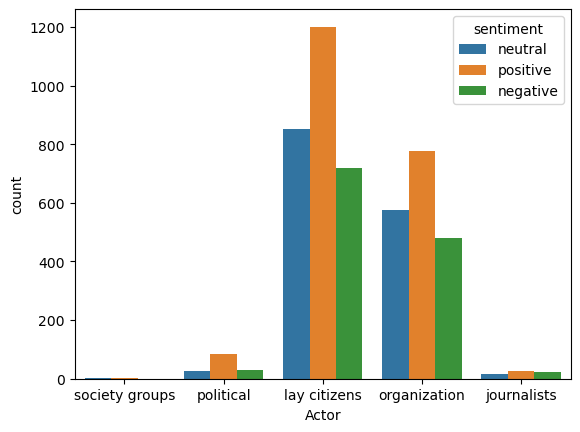

In [197]:
sns.countplot(x='Actor', hue='sentiment',data=df)

In [199]:
df['sentiment label'] = df['sentiment'].map({'positive':1, 'neutral':0, 'negative':-1})

In [198]:
df[df['Actor'] == 'lay citizens'][30:60]

,level_0,index,id,full_text,user,tokenized_tweets,sentiment,temp_list,Name,Connection,NER,Organization,Person,Actor
57,57,57,1171601160253448194,nailed pro immigration policy left debate part...,"{'id': 1075698308, 'id_str': '1075698308', 'na...","[he, nailed, the, pro, immigration, policy, an...",negative,"[nailed, pro, immigration, policy, left, debat...",Sempai Reg 🇨🇦🇧🇲🇺🇸 #PPC Founding Member,976,[],[],[],lay citizens
59,59,59,1171754721285160960,join us today ontarioquebec border cornwall se...,"{'id': 73136257, 'id_str': '73136257', 'name':...","[join, us, today, at, at, the, ontarioquebec, ...",neutral,"[join, us, today, ontarioquebec, border, cornw...",Stop Illegal Tobacco,1000,"[(#contraband, MONEY), (#, CARDINAL), (Canada,...",[],[],lay citizens
60,60,60,1171830088045912064,beware green nationalism recent european elect...,"{'id': 596452904, 'id_str': '596452904', 'name...","[beware, green, nationalism, in, the, recent, ...",positive,"[beware, green, nationalism, recent, european,...",Michelle Cohen,647,[],[],[],lay citizens
62,62,62,1171700398815465472,rt opens many white progressives insist contin...,"{'id': 16270415, 'id_str': '16270415', 'name':...","[rt, as, opens, many, white, progressives, wil...",positive,"[rt, opens, many, white, progressives, insist,...",Kitte - 🥚☘️🦂🍷🐔,466,"[(today, DATE)]",[],[],lay citizens
64,64,64,1171620338267873280,excuse im immigrant deny theres antiimmigrant ...,"{'id': 225857487, 'id_str': '225857487', 'name...","[excuse, you, im, an, immigrant, too, but, den...",positive,"[excuse, im, immigrant, deny, theres, antiimmi...",Sidd Mukherjee🇨🇦,288,[],[],[],lay citizens
65,65,65,1171734692879589376,nothing see folks surprises high hopes mannequ...,"{'id': 139501763, 'id_str': '139501763', 'name...","[nothing, to, see, here, folks, no, surprises,...",negative,"[nothing, see, folks, surprises, high, hopes, ...",Immigrants Canada,0,"[(Canada, GPE), (#, CARDINAL)]",[],[],lay citizens
69,69,69,1171784576756322304,il semble quun verre de jus dorange à ait été ...,"{'id': 2374469136, 'id_str': '2374469136', 'na...","[il, semble, quun, verre, de, jus, dorange, à,...",neutral,"[il, semble, quun, verre, de, jus, dorange, à,...",Luc M 🇨🇦 🇮🇱 🇺🇸 Bonjour-Hi-Hello How dare you,3260,[],[],[],lay citizens
71,71,71,1171852913490223105,update event changed locations cornwallis park...,"{'id': 1115726835545808896, 'id_str': '1115726...","[update, the, event, changed, locations, to, c...",positive,"[update, event, changed, locations, cornwallis...",🏴 Halifax Against Hate 🚩,135,"[(K'jipuktuk, GPE), (Canada, GPE), (902)700-15...",[],[],lay citizens
72,72,72,1171771398118883329,blessing means money refugee restaurateur offe...,"{'id': 112475398, 'id_str': '112475398', 'name...","[the, blessing, means, more, than, the, money,...",positive,"[blessing, means, money, refugee, restaurateur...",Senator Ratna Omidvar,1772,"[(Toronto, GPE)]",[],[],lay citizens
73,73,73,1171579600767528960,rt ppc leader maxime bernier defends immigrati...,"{'id': 2805881514, 'id_str': '2805881514', 'na...","[rt, ppc, leader, maxime, bernier, defends, im...",neutral,"[rt, ppc, leader, maxime, bernier, defends, im...",Sawyer Bogdan,0,"[(London, GPE), (@TheMooseBVL, PERSON)]",[],[@TheMooseBVL],lay citizens
